<a href="https://colab.research.google.com/github/hanyoseob/lecture_optimization/blob/main/chapter03_Gradient_descent_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Gradient Descent Method](https://en.wikipedia.org/wiki/Gradient_descent)
---
In [the previous chapter](https://colab.research.google.com/drive/1kwRveF00l0lNuR-020yA5FI-awQSK9HE?usp=sharing), I briefly explained the concept of the optimization problem and how to solve the problem using [a gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent).
In addition, we implemented 1D toy example which finds the minimum solution $x^*$ from the optimization problem $x^* = \arg \min_{x} F(x)$ where $F(x) = x^2$.

Here, we extend the 1D problem to the 2D optimization problem and its optimization problem is formulated as:

> $x^* = \arg \min_{x} F(x)$,

where a fidelity term $F(x)$ is defined as $\frac{1}{2} || Ax - y ||_2^2$, $A \in \mathbb{R}^{(K, N)}$ denotes a system matrix, $y \in \mathbb{R}^{(K, M)}$ is measurement collected from the system matrix $A$, and $x^* \in \mathbb{R}^{(N, M)}$ is a solution of the optimization problem. $K, N, M$ are the size of matrixes.

Specifically, we compare the results of [a pseudo inversion](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) and [the gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent).

## General solution
> $x_{n+1} = x_n - \lambda_n \nabla F(x_n)$,

where $F(\cdot)$ and $\nabla F(\cdot)$ are any objective function and its derivative function, respectively, and $\lambda_n$ is step size.

# Implementation
---

1. Problem definition
2. Implement the gradient descent method for solving 2D example

## Step 1. Problem definition

1. Objective function $F(x)$
> $F(x) = \frac{1}{2} || Ax - y ||_2^2$

2. its derivative $\nabla F(x)$
> $\nabla F(x) = A^T(Ax - y)$

3. Global solution

  > $x_{n+1} = x_n - \lambda_n \nabla F(x_n)$

  > $x_{n+1} = x_n - \lambda_n~A^T(Ax - y)$


## Step 2. Gradient descent method

1. Add packages
2. Set the parameters of the gradient decent method
3. Run the pseudo inversion $A^{-1}$
4. Run the gradient descent method

### Add packages

In [63]:
# Mathmetical packages
import numpy as np

# Metrics calculating packages
from skimage.metrics import normalized_root_mse as compare_nmse
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

# Ploting packages
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

# Ploting options
font = {'family': 'normal',
        'weight': 'bold',
        'size': 10}

matplotlib.rc('font', **font)


### Set the parameters of the gradient descent method

In [64]:
# the dimension of matrixes
K = 60
N = 50
M = 40

# A: System matrix in (K, N)
A = np.random.randn(K, N)

# x: Ground truth in (N, M)
x_gt = np.random.rand(N, M)

# y: output in (K, M)
y = np.matmul(A, x_gt)

# F: Objective function
# dF: Its derivative
F = lambda x: 1/2 * np.sum( (np.matmul(A, x) - y) ** 2 ) ** 1/2
dF = lambda x: np.matmul(A.T, np.matmul(A, x) - y)

# Hyper parameters for the gradient descent method
max_iter = 50000
step_size = 1e-3


### Run the pseudo inversion $A^{-1}$

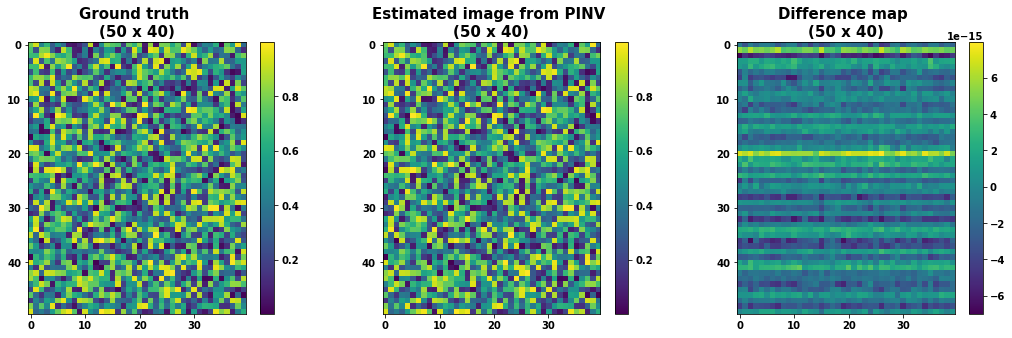

Result from Pseudo inversion
NSME: 4.2362e-15
PSNR: 292.2131
SSIM: 1.0000


In [65]:
# A^-1: Inverse system matrix in (N, K)
AINV = np.linalg.pinv(A)

# Pseudo inversion
x = np.matmul(AINV, y)

# Plot the results
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18, 5))

ax = axs[0]
pcm = ax.imshow(x_gt)
ax.set_title('Ground truth \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[1]
pcm = ax.imshow(x)
ax.set_title('Estimated image from PINV \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[2]
pcm = ax.imshow(x_gt - x)
ax.set_title('Difference map \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

plt.show()

# Calculate the quantitative metrics such as NMSE, PSNR, and SSIM
x_est_from_pinv = x

nmse_pinv = compare_nmse(x_gt, x_est_from_pinv)
psnr_pinv = compare_psnr(x_gt, x_est_from_pinv)
ssim_pinv = compare_ssim(x_gt, x_est_from_pinv)

print('Result from Pseudo inversion')
print('NSME: %.4e' % nmse_pinv)
print('PSNR: %.4f' % psnr_pinv)
print('SSIM: %.4f' % ssim_pinv)

### Run the gradient descent method

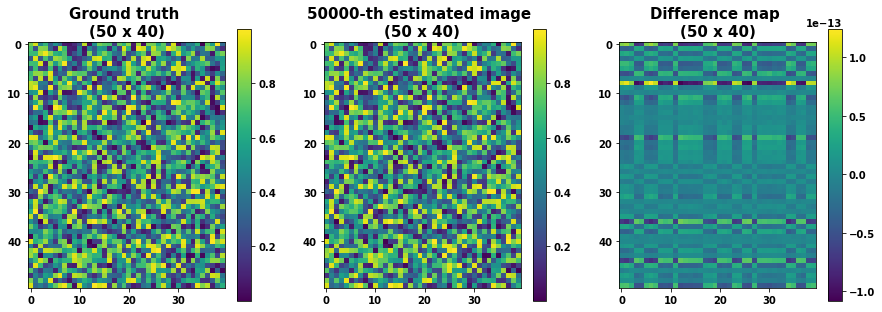

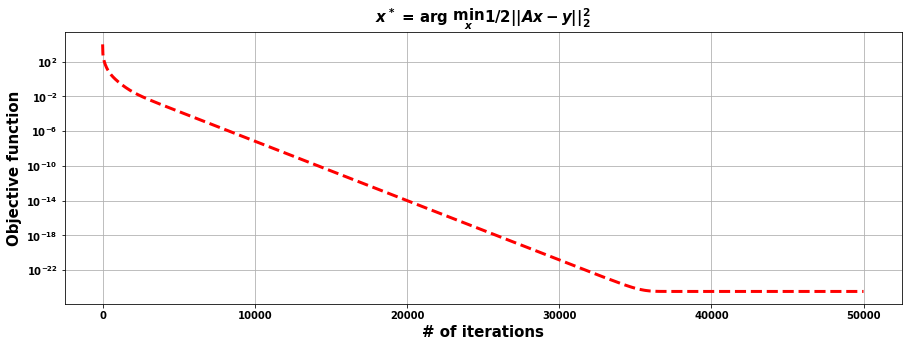

Result from Gradient descetn method
NSME: 5.0903e-14
PSNR: 270.6176
SSIM: 1.0000


In [66]:
x = np.zeros((N, M))

x_iter = []
y_iter = []

x_iter.append(x)
y_iter.append(F(x))

for i in range(1, max_iter + 1):

  # Grdient descent method
  x = x - step_size * dF(x)

  x_iter.append(x)
  y_iter.append(F(x))

  # Plot the results from gradient descent method
  if ((i + 1) % 5000) == 0 or (i + 1) == max_iter:
    # Plot the images from ground truth, gradient descent method, and difference map.
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

    ax = axs[0]
    pcm = ax.imshow(x_gt)
    ax.set_title('Ground truth \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
    fig.colorbar(pcm, ax=ax)

    ax = axs[1]
    pcm = ax.imshow(x)
    ax.set_title('%d-th estimated image \n(%d x %d)' % (i + 1, N, M), fontsize=15, fontweight='bold')
    fig.colorbar(pcm, ax=ax)

    ax = axs[2]
    pcm = ax.imshow(x_gt - x)
    ax.set_title('Difference map \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
    fig.colorbar(pcm, ax=ax)

    # Plot a curve of the objective function
    fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15, 5))

    axs.semilogy(y_iter, 'r--', linewidth=3)
    axs.grid(True)
    axs.set_xlabel('# of iterations', fontsize=15, fontweight='bold')
    axs.set_ylabel('Objective function', fontsize=15, fontweight='bold')
    axs.set_title('$x^*$ = arg $\min_x 1/2 || Ax - y ||^2_2$', fontsize=15, fontweight='bold')

    display.clear_output(wait=True)
    # display.display(pl.gcf())
    plt.show()

# Calculate the quantitative metrics such as NMSE, PSNR, and SSIM
x_est_from_gd = x

nmse_gd = compare_nmse(x_gt, x_est_from_gd)
psnr_gd = compare_psnr(x_gt, x_est_from_gd)
ssim_gd = compare_ssim(x_gt, x_est_from_gd)

print('Result from Gradient descetn method')
print('NSME: %.4e' % nmse_gd)
print('PSNR: %.4f' % psnr_gd)
print('SSIM: %.4f' % ssim_gd)

# Conclusion

Below figure shows the solutions from [the pseudo inversion](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) and [the gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent).
When you see the results below, they are very similar to each other because the system matrix $A$ has a low condition number. In order words, the rank of the system matrix $A$ is almost the full rank.

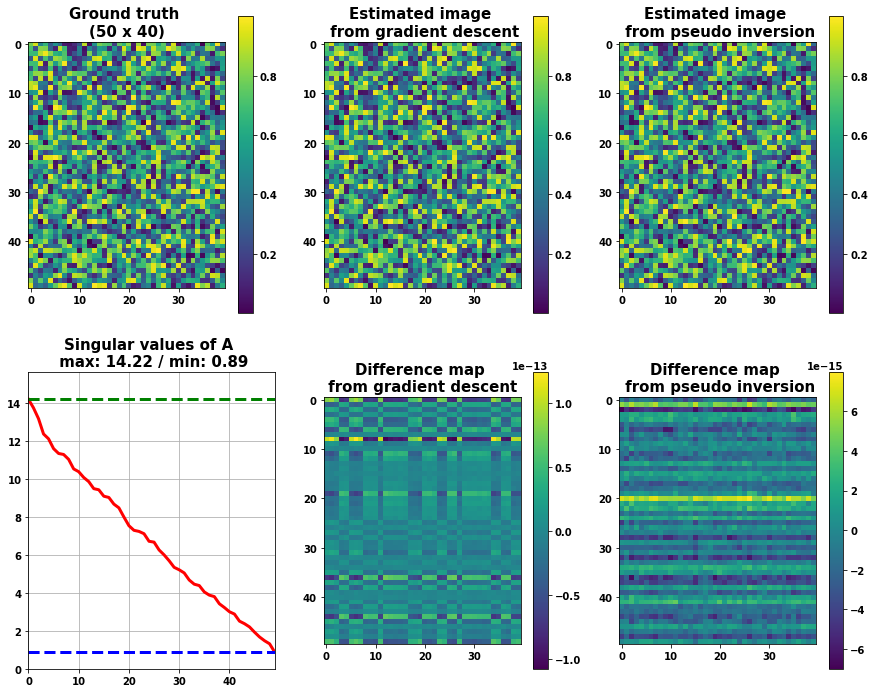

 
Quantitative metrics
 
Normalized  Mean Sqaure Error (NMSE)
Pseudo inversion: 4.2362e-15
Gradient Descnet: 5.0903e-14
 
Peak Signal to Noise Ratio (PSNR)
Pseudo inversion: 292.2131
Gradient Descnet: 270.6176
 
Structural Similarity Index Measure (SSIM)
Pseudo inversion: 1.0000
Gradient Descnet: 1.0000
 


In [67]:
# Apply a singular value decomposition (SVD) to the system matrix A
u, s, vt = np.linalg.svd(A, full_matrices=False)

# Plot the results
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 12))

ax = axs[0, 0]
pcm = ax.imshow(x_gt)
ax.set_title('Ground truth \n(%d x %d)' % (N, M), fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[0, 1]
pcm = ax.imshow(x_est_from_gd)
ax.set_title('Estimated image \n from gradient descent', fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[0, 2]
pcm = ax.imshow(x_est_from_pinv)
ax.set_title('Estimated image \n from pseudo inversion', fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[1, 0]
ax.plot(s, 'r', linewidth=3)
ax.plot(s[0] * np.ones_like(s), 'g--', linewidth=3)
ax.plot(s[-1] * np.ones_like(s), 'b--', linewidth=3)
ax.grid(True)
ax.set_xlim(0, len(s) - 1)
ax.set_ylim(0, 1.1*s[0])
ax.set_title('Singular values of A \n max: %.2f / min: %.2f' % (s[0], s[-1]), fontsize=15, fontweight='bold')

# pcm = ax.semilogy(y_iter, 'r--', linewidth=3)
# ax.grid(True)
# ax.set_xlabel('# of iterations', fontsize=15, fontweight='bold')
# ax.set_ylabel('Objective function', fontsize=15, fontweight='bold')
# ax.set_title('$x^*$ = arg $\min_x 1/2 || Ax - y ||^2_2$', fontsize=15, fontweight='bold')

ax = axs[1, 1]
pcm = ax.imshow(x_gt - x_est_from_gd)
ax.set_title('Difference map \n from gradient descent ', fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

ax = axs[1, 2]
pcm = ax.imshow(x_gt - x_est_from_pinv)
ax.set_title('Difference map \n from pseudo inversion', fontsize=15, fontweight='bold')
fig.colorbar(pcm, ax=ax)

plt.show()

# Print the quantitative metrics
print(' ')
print('Quantitative metrics')
print(' ')

print('Normalized  Mean Sqaure Error (NMSE)')
print('Pseudo inversion: %.4e' % nmse_pinv)
print('Gradient Descnet: %.4e' % nmse_gd)
print(' ')

print('Peak Signal to Noise Ratio (PSNR)')
print('Pseudo inversion: %.4f' % psnr_pinv)
print('Gradient Descnet: %.4f' % psnr_gd)
print(' ')

print('Structural Similarity Index Measure (SSIM)')
print('Pseudo inversion: %.4f' % ssim_pinv)
print('Gradient Descnet: %.4f' % ssim_gd)
print(' ')

# Next
---

Next chapter, we will implement the [gradient descent method](https://en.wikipedia.org/wiki/Gradient_descent) to solve a 2D blur problem converd in Chapter 1.